In [1]:
import pandas as pd
df = pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [2]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [3]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [4]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [5]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [6]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [7]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [8]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [9]:
df['duration'].value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: count, Length: 476, dtype: int64

In [10]:
df['duration'].min() #this is the shortest flight

0.83

In [11]:
df['duration'].max() # this is the longest flight

49.83

In [12]:
df['duration'].median()

11.25

## Preprocessing 

In [13]:
df = df.drop('Unnamed: 0', axis =1)
df = df.drop('flight', axis = 1)

# Binary encoding

df['class'] = df['class'].apply([lambda x: 1 if x == 'Business' else 0])

In [14]:
df.stops = pd.factorize(df.stops)[0]

In [15]:
pd.get_dummies(df.airline, prefix='airline')

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
300148,False,False,False,False,False,True
300149,False,False,False,False,False,True
300150,False,False,False,False,False,True
300151,False,False,False,False,False,True


## One-Hot Encoding and Dropping Original Columns

In [16]:
# Applying one-hot encoding
# Use this code if you receive a binary result otherwise make use of the code below
#df = df.join(pd.get_dummies(df.airline, prefix='airlines')).drop('airline', axis=1)
#df = df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1)
#df = df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city', axis=1)
#df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
#df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)

In [17]:
#df

In [18]:
# Applying one-hot encoding
df = df.join(pd.get_dummies(df.airline, prefix='airline').astype(int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source').astype(int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest').astype(int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival').astype(int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure').astype(int)).drop('departure_time', axis=1)


In [19]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Training Regression Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis = 1), df.price # This means X is everything except 'price' while y is just price

In [21]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
#lets train a regression model
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

# Bear in mind - When using a RandomForestRegressor, scaling your data is generally not necessary. 

RandomForestRegressor(n_jobs=-1)

In [24]:
# lets fit the model
reg.score(X_test, y_test)

0.9855550464217946

In [25]:
# Let's get more metric and increase the performance of this model

import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error,(y_test, y_pred))
print('MSE:', mean_squared_error,(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9855550464217946
MAE: <function mean_absolute_error at 0x000001E26F767100> (94675      5179
296787    54896
19604      4496
77773      9201
238974    60365
          ...  
220       15353
16332      4496
192703     5076
94277      7539
150555     7141
Name: price, Length: 60031, dtype: int64, array([ 5179.  , 55086.  ,  4482.24, ...,  4957.88,  8656.  ,  7362.36]))
MSE: <function mean_squared_error at 0x000001E26F7674C0> (94675      5179
296787    54896
19604      4496
77773      9201
238974    60365
          ...  
220       15353
16332      4496
192703     5076
94277      7539
150555     7141
Name: price, Length: 60031, dtype: int64, array([ 5179.  , 55086.  ,  4482.24, ...,  4957.88,  8656.  ,  7362.36]))
RMSE: 2732.544629592437


Text(0.5, 1.0, 'Prediction Vs Actual Price')

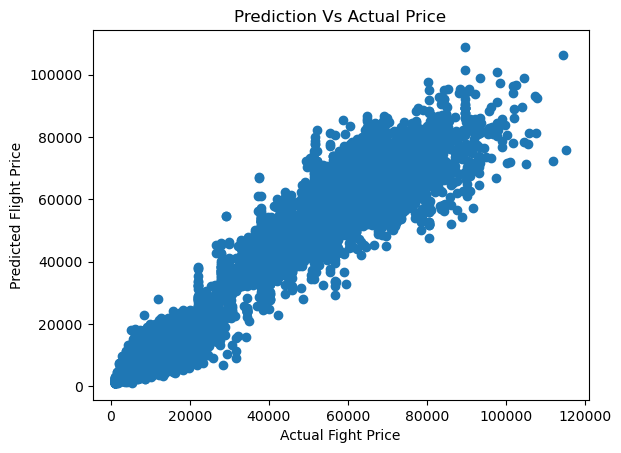

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction Vs Actual Price')

In [27]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [28]:
# What kind of features are relevant for this?
# We will use sorted importance for this. The sorted_importances list helps us understand which 
# features have the most influence on the model’s predictions, which can be useful for feature selection or interpretation of the model.

importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances


[('class', 0.880108922318162),
 ('duration', 0.057290720047153576),
 ('days_left', 0.01858831387364277),
 ('airline_Air_India', 0.005496061755289441),
 ('airline_Vistara', 0.004448057223979382),
 ('source_Delhi', 0.003742523310652608),
 ('dest_Delhi', 0.0032657028706892677),
 ('source_Mumbai', 0.0022393399154463324),
 ('dest_Mumbai', 0.001919452458654905),
 ('stops', 0.0018724182738520327),
 ('dest_Kolkata', 0.0018403047625445295),
 ('source_Kolkata', 0.0017705745510808537),
 ('arrival_Evening', 0.0016338886260389039),
 ('dest_Hyderabad', 0.0014660272346411346),
 ('dest_Bangalore', 0.0013021282017715618),
 ('source_Hyderabad', 0.0012736284917273324),
 ('arrival_Night', 0.0011494991292793763),
 ('source_Bangalore', 0.0010749273035537204),
 ('departure_Evening', 0.0010595350277579285),
 ('arrival_Afternoon', 0.000996390166280793),
 ('source_Chennai', 0.0009112600939519815),
 ('dest_Chennai', 0.0008760835886432351),
 ('departure_Afternoon', 0.0008402961029471065),
 ('departure_Morning', 0

In [29]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

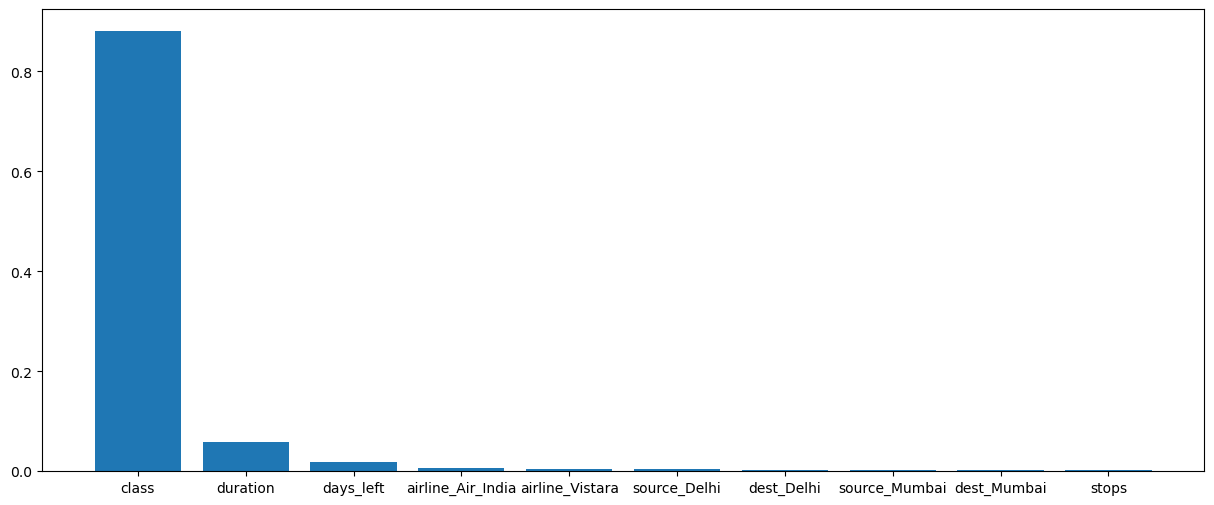

In [30]:
plt.figure(figsize=(15, 6))
plt.bar([x[0] for x in sorted_importances[:10]],[x[1] for x in sorted_importances[:10]])

In [33]:
'''# Hyper-parameter tuning
# This will take a longer time before it's execution, you can use the preceeding code for a faster output

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']  # Adding 'log2' as a common option
}

# Initialize the model
model = RandomForestRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters found: ", best_params)'''


'# Hyper-parameter tuning\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\n\n# Define the parameter grid\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']  # Adding \'log2\' as a common option\n}\n\n# Initialize the model\nmodel = RandomForestRegressor()\n\n# Set up GridSearchCV\ngrid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=\'neg_mean_squared_error\')\n\n# Fit the grid search\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters\nbest_params = grid_search.best_params_\n\nprint("Best parameters found: ", best_params)'

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 300),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the trees
    'min_samples_split': randint(2, 11),  # Minimum number of samples required to split an internal node
    'max_features': ['auto', 'sqrt', 1.0]  # Number of features to consider when looking for the best split
}

# Initialize the RandomForestRegressor
reg = RandomForestRegressor(n_jobs=-1)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=reg,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings to sample
    cv=3,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Scoring metric
    verbose=2,  # Verbosity level
    random_state=10,  # Random seed
    n_jobs=-1  # Use all available CPUs
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best estimator
best_regressor = random_search.best_estimator_

# Print best parameters
print("Best parameters found:", random_search.best_params_)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HomePC\anaconda3\Lib\site-packag

Best parameters found: {'max_depth': None, 'max_features': 1.0, 'min_samples_split': 10, 'n_estimators': 264}


In [36]:
best_regressor.score(X_test, y_test)

0.9868451835870851

In [37]:
# Let's get more metric and increase the performance of this model

import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error,(y_test, y_pred))
print('MSE:', mean_squared_error,(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9868451835870851
MAE: <function mean_absolute_error at 0x000001E26F767100> (94675      5179
296787    54896
19604      4496
77773      9201
238974    60365
          ...  
220       15353
16332      4496
192703     5076
94277      7539
150555     7141
Name: price, Length: 60031, dtype: int64, array([ 5190.5366862 , 56141.27025344,  4423.19961593, ...,
        4886.95828102,  7888.37307518,  7298.57627385]))
MSE: <function mean_squared_error at 0x000001E26F7674C0> (94675      5179
296787    54896
19604      4496
77773      9201
238974    60365
          ...  
220       15353
16332      4496
192703     5076
94277      7539
150555     7141
Name: price, Length: 60031, dtype: int64, array([ 5190.5366862 , 56141.27025344,  4423.19961593, ...,
        4886.95828102,  7888.37307518,  7298.57627385]))
RMSE: 2607.663717456224


Text(0.5, 1.0, 'Prediction Vs Actual Price')

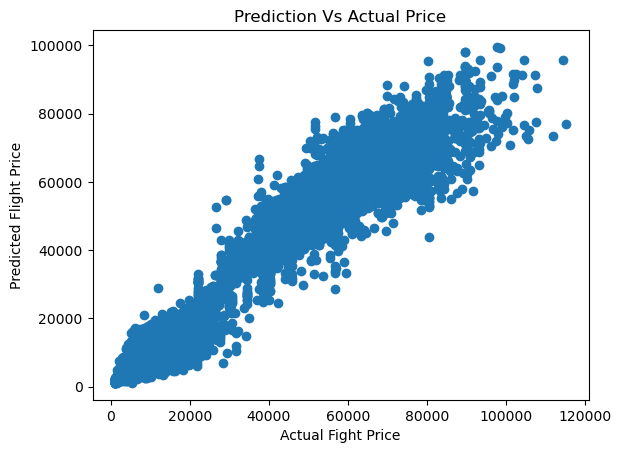

In [38]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction Vs Actual Price')